## Welcome to my Notebook to perform Classification of Tweets with SpaCy

**Structure**
* Package Setup
* Pandas Profiling
* EDA
* Sample Text
* Pipline
* Statistical Language Models
* Neural Language Models
* Comparison
* Conclusion

In [ ]:
# Installation of packages and pipeline
import sys
!pip install spacy
!python -m spacy download en_core_web_sm
!python -m spacy download en_core_web_trf
!pip install spacy[transformer]

  Using cached typing_extensions-3.10.0.2-py3-none-any.whl (26 kB)
ERROR: tensorflow 2.4.1 has requirement six~=1.15.0, but you'll have six 1.16.0 which is incompatible.
ERROR: tensorflow 2.4.1 has requirement typing-extensions~=3.7.4, but you'll have typing-extensions 3.10.0.2 which is incompatible.
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.0.1
    Not uninstalling typing-extensions at /shared-libs/python3.7/py-core/lib/python3.7/site-packages, outside environment /root/venv
    Can't uninstall 'typing-extensions'. No files were found to uninstall.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
2021-12-16 05:29:40.289580: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-16 05:29:40.289639: I tensorflow/stream_executor/cuda

In [ ]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
import spacy
import missingno as msno

In [ ]:
# Import dataset and pandas
raw_trainDF = pd.read_csv("/work/Covid-19-Sentiment/Corona_NLP_train.csv")
raw_testDF = pd.read_csv("/work/Covid-19-Sentiment/Corona_NLP_test.csv")
raw_trainDF.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [ ]:
raw_testDF.head(2)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive


In [ ]:
# Copy the values of the data for further uses
trainDF = raw_trainDF
testDF = raw_testDF

# EDA

<AxesSubplot:>

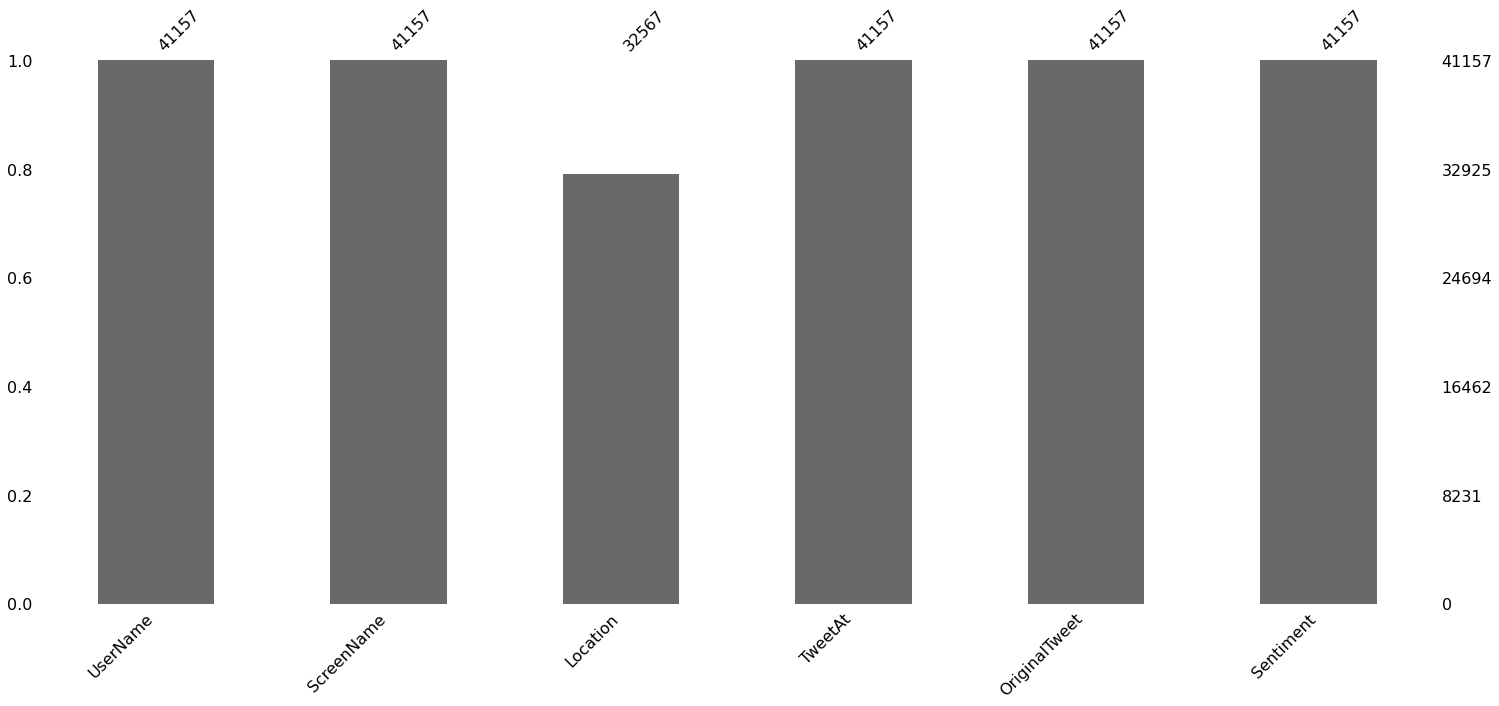

In [ ]:
# missing values of train data
msno.bar(trainDF)

<AxesSubplot:>

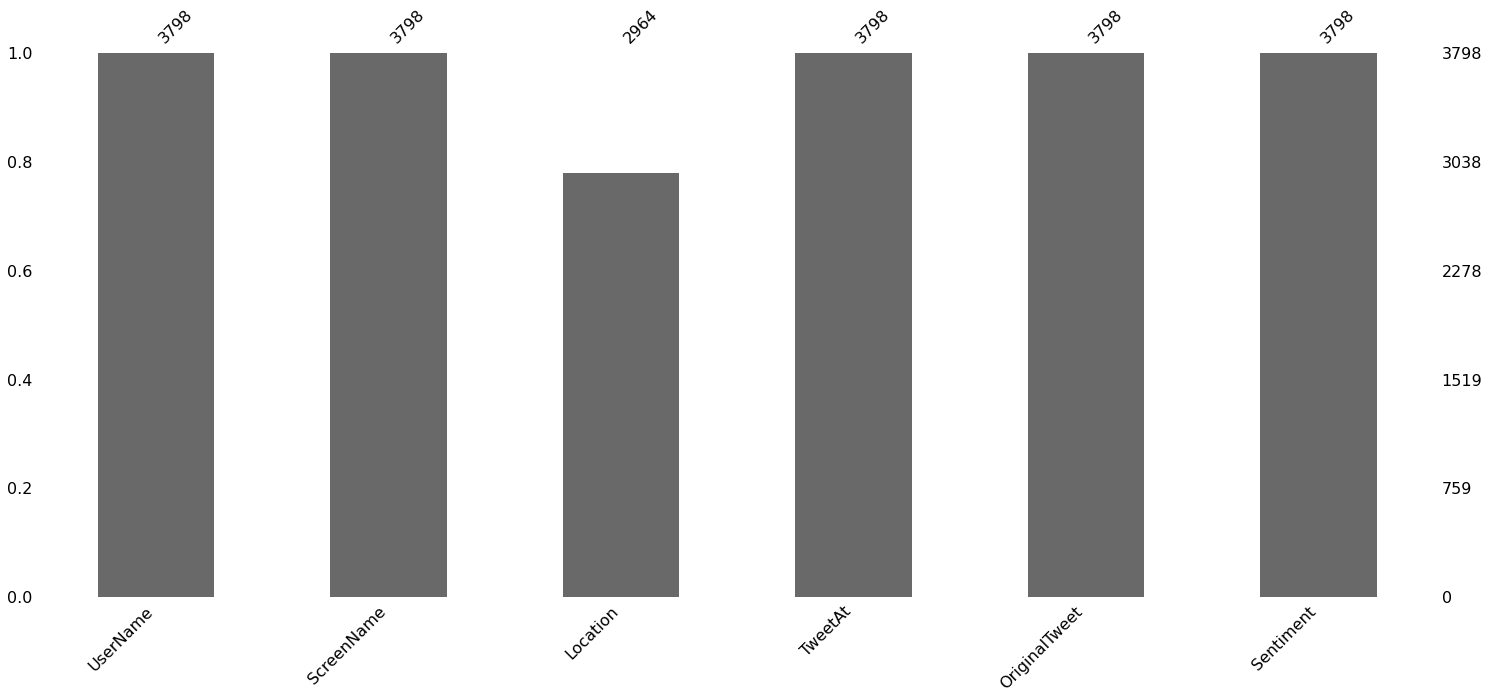

In [ ]:
# missing values of test data
msno.bar(testDF)

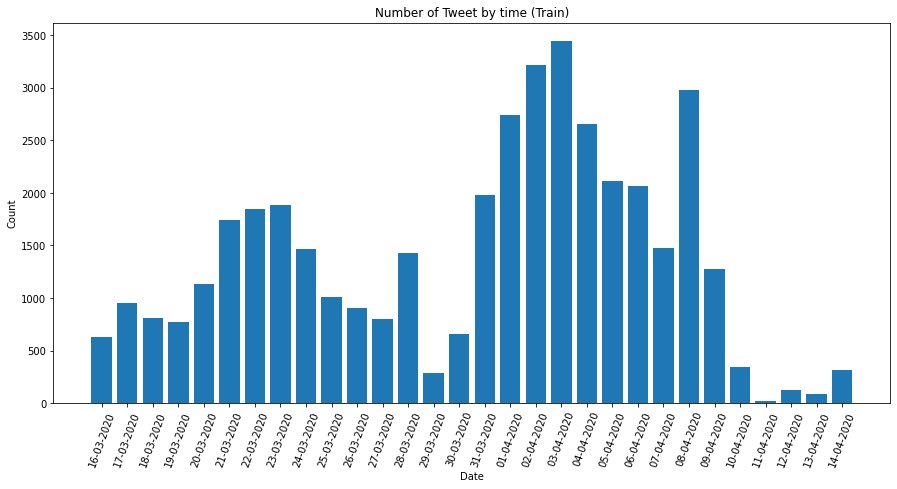

In [ ]:
# Visualization of the TweetAt categories for train set
sentiments = trainDF.groupby(by = ['TweetAt']).count()['Sentiment']
time = trainDF.TweetAt.unique()

fig = plt.figure(figsize=(15,7))
plt.xticks(rotation=70)
plt.bar(time,sentiments)
plt.xlabel("Date")
plt.ylabel("Count")
plt.title("Number of Tweet by time (Train)")
plt.show()

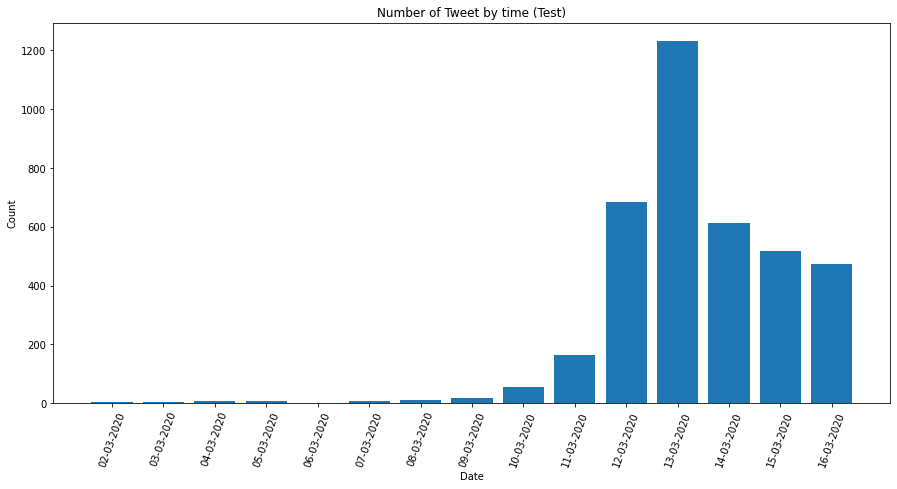

In [ ]:
# Visualization of the TweetAt categories for test set
sentiments = testDF.groupby(by = ['TweetAt']).count()['Sentiment']
time = testDF.TweetAt.unique()

fig = plt.figure(figsize=(15,7))
plt.xticks(rotation=70)
plt.bar(time,sentiments)
plt.xlabel("Date")
plt.ylabel("Count")
plt.title("Number of Tweet by time (Test)")
plt.show()

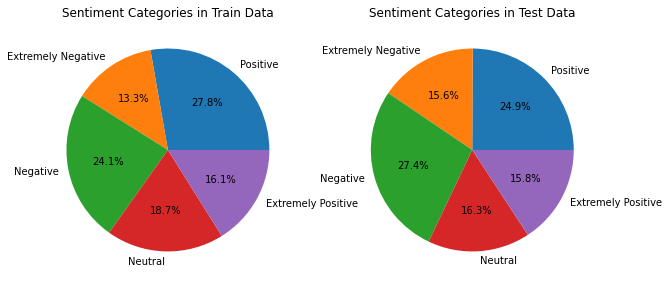

In [ ]:
# Create visualization of the sentiment category
sent_names = list(set(trainDF.Sentiment.values))
train_sent_cats = []
test_sent_cats = []

for name in sent_names:
    train_sent_cats.append(trainDF.Sentiment.value_counts()[name])
    test_sent_cats.append(testDF.Sentiment.value_counts()[name])

fig, ax = plt.subplots(1,2, figsize = (10,5))
ax[0].pie(train_sent_cats, labels = sent_names, autopct='%1.1f%%')
ax[0].set_title("Sentiment Categories in Train Data")
ax[1].pie(test_sent_cats, labels = sent_names, autopct='%1.1f%%')
ax[1].set_title("Sentiment Categories in Test Data")
plt.show()

In [ ]:
# Train test split
from sklearn.model_selection import train_test_split

# Concat the two datasets and split them
allDF = pd.concat((trainDF, testDF), ignore_index=True)

# Sample dataset due to the large size
allDF = allDF.sample(frac=0.5).reset_index(drop=True)

# Split the train, test, validation set
trainDF, testDF = train_test_split(allDF, test_size = 0.2)
testDF, validDF = train_test_split(testDF, test_size = 0.2)

# Print values
print("Train:",len(trainDF), "Test:", len(testDF),"Valid:", len(validDF))

Train: 17982 Test: 3596 Valid: 900


In [ ]:
# Print a sample text
sample_text = trainDF.OriginalTweet[2]
print(sample_text)

CPG COMPANIES RESPOND TO NEW NORMAL "Increased, levels of sustained, online grocery shopping will continue long after people return to their normal lives."   https://t.co/GKZDSoLwcg #consumerbehavior #consumption #cpg #retail #retailtrends #covid19


In [ ]:
# Load the English library from SpaCy
nlp = spacy.load("en_core_web_sm")

# Apply nlp() to all values in "OriginalTweet"
testDF.nlp = testDF.OriginalTweet.apply(lambda x: nlp(x))

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """


In [ ]:
# Testing out spaCy with pandas
testDF.np = testDF.nlp.apply(lambda x: [chunk.text for chunk in x.noun_chunks])
testDF.vb = testDF.nlp.apply(lambda x: [token.lemma_ for token in x if token.pos_ == "VERB"])
print(testDF.np.head())
print(testDF.vb.head())

10566    [Monday 23 Mar 2020 Covid-19 Update, Online Or...
2602     [Me, home, what money, I, Id, online shopping...
21157    [my book prices, those, who, some, Both, 99 ce...
21061    [It, a grocery store, empty shelves, sold-out ...
2924     [Food inflation, supply shortage, food items, ...
Name: OriginalTweet, dtype: object
10566                                             [expect]
2602                        [sit, try, spend, have, offer]
21157                            [drop, like, isolate, re]
21061                              [seem, sell, buy, find]
2924     [go, spike, lockdown, create, rise, hump, expect]
Name: OriginalTweet, dtype: object
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWa

In [ ]:
# Use spaCy for NP, V, and NER
nlp = spacy.load("en_core_web_sm")
doc = nlp(sample_text)

# Analyze syntax
print("Noun phrases:", [chunk.text for chunk in doc.noun_chunks])
print("Verbs:", [token.lemma_ for token in doc if token.pos_ == "VERB"])

# Find named entities, phrases and concepts
for entity in doc.ents:
    print(entity.text, entity.label_)

Noun phrases: ['CPG COMPANIES', 'NEW NORMAL "Increased, levels', 'online grocery shopping', 'people', 'their normal lives', '  https://t.co/GKZDSoLwcg #consumerbehavior #consumption #cpg', '#retail #retailtrends']
Verbs: ['sustain', 'continue', 'return']
CPG ORG
# CARDINAL
#consumption #cpg # MONEY
#retailtrends # MONEY


### Preprocessing

This is the first part of the preprocessing where we create all parts of the pipeline except for the models.

Structure
* Label encode
* Contextual Spell Check
* Tokenizer
* Pipeline

In [ ]:
# Install package for Contextual Spell Check
!pip install contextualSpellCheck
!pip install ipywidgets

  Using cached typing_extensions-3.10.0.2-py3-none-any.whl (26 kB)
ERROR: tensorflow 2.4.1 has requirement six~=1.15.0, but you'll have six 1.16.0 which is incompatible.
ERROR: tensorflow 2.4.1 has requirement typing-extensions~=3.7.4, but you'll have typing-extensions 3.10.0.2 which is incompatible.
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.0.1
    Not uninstalling typing-extensions at /shared-libs/python3.7/py-core/lib/python3.7/site-packages, outside environment /root/venv
    Can't uninstall 'typing-extensions'. No files were found to uninstall.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


Encode the Labels

In [ ]:
# Label Encoder for classes in sentiment 
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
trainDF.encoded_sentiment = encoder.fit_transform(trainDF.Sentiment)
trainDF.encoded_sentiment

encoder = LabelEncoder()
testDF.encoded_sentiment = encoder.fit_transform(testDF.Sentiment)
testDF.encoded_sentiment

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  if __name__ == '__main__':


array([4, 3, 3, ..., 0, 3, 4])

Spelling Correction

In [ ]:
# Correct Spelling
import contextualSpellCheck

# Download spacy English library
# nlp = spacy.load('en_core_web_sm')

# Add contextual spellchecker to the pipeline

nlp.add_pipe("contextual spellchecker", config={"max_edit_dist": 5})    

# create token of text
doc = nlp(sample_text)

print(doc._.outcome_spellCheck)

In [ ]:
import string
import re

# Load the English library from SpaCy
nlp = spacy.load("en_core_web_sm")

# Add contextual spell check to pipeline
nlp.add_pipe("contextual spellchecker", config={"max_edit_dist": 5})    

# Create list of punctuation marks
punctuations = string.punctuation

# Create list of stopwords from spaCy
stopwords = spacy.lang.en.stop_words.STOP_WORDS

# Remove URLs
def remove_urls(text):
    text = re.sub(r"\S*https?:\S*", "", text, flags=re.MULTILINE)
    return text

# Creat tokenizer function
def spacy_tokenizer(sentence):
    # Create token object from spacy
    tokens = nlp(sentence)

    # Correct spelling
    # tokens = tokens._.outcome_spellCheck
    # tokens = nlp(tokens)

    # Lemmatize each token and convert each token into lowercase
    tokens = [word.lemma_.lower().strip() if word.lemma_ != "PROPN" else word.lower_ for word in tokens]
    
    # Remove stopwords
    tokens = [word for word in tokens if word not in stopwords and word not in punctuations]
    
    # Remove links
    tokens = [remove_urls(word) for word in tokens]
    
    # return preprocessed list of tokens
    return tokens

spacy_tokenizer(sample_text)

['cpg',
 'company',
 'respond',
 'new',
 'normal',
 'increased',
 'level',
 'sustain',
 'online',
 'grocery',
 'shopping',
 'continue',
 'long',
 'people',
 'return',
 'normal',
 'life',
 '',
 'consumerbehavior',
 'consumption',
 'cpg',
 'retail',
 'retailtrend',
 'covid19']

**Bag-of-words Model**

In [ ]:
# Bag-of-words data transformation
from sklearn.feature_extraction.text import CountVectorizer
bow_vector = CountVectorizer(tokenizer = spacy_tokenizer, ngram_range=(1,1))

**Pipeline**

In [ ]:
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline

# Custom transformer class using spaCy
class predictors(TransformerMixin):
    def transform(self, X, **transform_params):
        # Implement clean_text
        return [clean_text(text) for text in X]

    def fit(self, X, y=None, **fit_params):
        return self

    def get_params(self, deep=True):
        return {}

# Basic function to clean the text
def clean_text(text):
    # Remove spaces and converte text into lowercase
    return text.strip().lower()

# Bag-of-words data transformation
from sklearn.feature_extraction.text import CountVectorizer
bow_vector = CountVectorizer(tokenizer = spacy_tokenizer, ngram_range=(1,1))

# Statistical Model Training

In [ ]:
X_train = trainDF.OriginalTweet
X_test = testDF.OriginalTweet
y_train = trainDF.encoded_sentiment
y_test = testDF.encoded_sentiment

In [ ]:
X_train

7565     Due to the #coronavirus...\r\r\n- All paid and...
12224    GREAT NEWS!\r\r\n\r\r\nREDUCED PRICES DUE TO #...
22393    How COVID 19 Is Impacting Online Shopping Beha...
5216     .@MollyKinder: As worried Americans pack super...
18522    investment bankers have been candid on invest...
                               ...                        
12070    And now lets pause for a little funny.\r\r\n....
14891    CDC: At-risk Americans (60 &amp; over) and imm...
16090    The only things this epidemic hasn't stopped a...
3975     Coronavirus Forces Grocery Stores To Increase ...
21625    The @US_FDA has issued warnings regarding frau...
Name: OriginalTweet, Length: 17982, dtype: object

In [ ]:
# Multinomial Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()

# Create pipeline using Bag of Words
pipe_NB = Pipeline([("cleaner", predictors()),
                 ('vectorizer', bow_vector),
                 ('classifier', classifier)])

In [ ]:
# Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression
classifier_log = LogisticRegression()

# Create pipeline using Bag of Words
pipe_log = Pipeline([("cleaner", predictors()),
                 ('vectorizer', bow_vector),
                 ('classifier', classifier_log)])

# model generation
pipe_log.fit(X_train,y_train)

KeyboardInterrupt: 

In [ ]:
# SVM Classifier
from sklearn.svm import SVC
classifier_svm = SVC()

# Create pipeline using Bag of Words
pipe_svm = Pipeline([("cleaner", predictors()),
                 ('vectorizer', bow_vector),
                 ('classifier', classifier_svm)])

# model generation
pipe_svm.fit(X_train,y_train)

**Model Performance**

In [ ]:
# Classification Report
from sklearn.metrics import classification_report

# Predict with a test dataset
predicted = pipe_NB.predict(X_test)

# Model Accuracy
print("Naive Bayes Model:\n")
print(classification_report(y_test, predicted))

In [ ]:
# Classification Report
from sklearn.metrics import classification_report
# Predicting with a test dataset
predicted_log = pipe_log.predict(X_test)

# Model Accuracy
print("Logistic Regression Model:\n")
print(classification_report(y_test, predicted_log, target_names = ['Extremely Negative', 'Negative', 'Neutral', 'Positive', 'Extremely Positive']))


In [ ]:
# Classificatin Report
from sklearn.metrics import classification_report
# Predicting with a test dataset
predicted_svm = pipe_svm.predict(X_test)

# Model Accuracy
print("SVM Model:\n")
print(classification_report(y_test, predicted_svm, target_names = ['Extremely Negative', 'Negative', 'Neutral', 'Positive', 'Extremely Positive']))


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=181ff363-6d59-45ee-9026-f63493ad1bb9' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>